### resize image


In [1]:
import os
import cv2
os.chdir("D:/Dataset/cancer")
img =cv2.imread('D:/Dataset/cancer/1.jpg')

In [2]:
import os
import cv2
os.chdir("D:/Dataset/Non-Cancer")
img =cv2.imread('D:/Dataset/Non-Cancer/1.jpg')

In [3]:
cv2.imshow('img',img)
cv2.waitKey(6000)
cv2.destroyAllWindows()

In [9]:
resize=cv2.resize(img,(256,256),interpolation=cv2.INTER_AREA)

In [10]:
cv2.imshow('res',resize)
cv2.waitKey(2000)
cv2.destroyAllWindows()

In [11]:
cv2.imwrite("img.jpg",resize)

True

In [12]:

for j in range(1,8):   
    for i in range(0,50):
        im=cv2.imread("D:/Dataset/cancer/"+str(j)+".jpg")
        resize=cv2.resize(im,(1028,1028),interpolation=cv2.INTER_AREA)
        cv2.imwrite("D:/Dataset/cancer/"+str(j)+str(i)+".jpg",resize)

In [13]:
for j in range(1,6):   
    for i in range(0,50):
        im=cv2.imread('D:/Dataset/Non-Cancer/'+str(j)+'.jpg')
        resize=cv2.resize(im,(1028,1028),interpolation=cv2.INTER_AREA)
        cv2.imwrite("D:/Dataset/Non-Cancer/"+str(j)+str(i)+".jpg",resize)

In [14]:
for i in range(1,8):
    n=str(i)
    img=cv2.imread('D:/dataset/cancer/'+n+'.jpg')
    resize=cv2.resize(img,(1028,1028),interpolation=cv2.INTER_AREA)
    cv2.imwrite("D:/Dataset/Resized cancer/"+n+".jpg",resize)

In [15]:
for i in range(1,6):
    n=str(i)
    img=cv2.imread('D:/dataset/Non-Cancer/'+n+'.jpg')
    resize=cv2.resize(img,(1028,1028),interpolation=cv2.INTER_AREA)
    cv2.imwrite("D:/Dataset/Resized Non-Cancer/"+n+".jpg",resize)

#Image Data Generation

In [16]:
from tensorflow.keras.utils import array_to_img, img_to_array, load_img

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
datagen = ImageDataGenerator(rotation_range=40,width_shift_range=0.1,
                            height_shift_range=0.1,shear_range=0.2,
                            zoom_range=0.2,horizontal_flip=False,
                            fill_mode='nearest')

In [138]:
def img_gene(img):
    img = load_img(img)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='D:/Dataset/cancer',
                              save_prefix='10', save_format='jpg'):
        i+= 1
        if i > 20:
            break

In [139]:
for p in range(1,7):
    num=str(p)
    img="D:/Dataset/Resized cancer/"+num+".jpg"
    img_gene(img)

In [ ]:
# import os
# # assign directory
# directory = "D:/Dataset/Resized Non-Cancer/"
 
# # iterate over files in
# # that directory
# for c in os.listdir(directory):
#     f = os.path.join(directory, c)
#     if os.path.isfile(f):
#         #img="D:/Dataset/Resized cancer/"+num+".jpg"
#         img_gene(f)

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter 
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model

In [24]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [26]:
## loading training set
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dataset/Train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 231 files belonging to 2 classes.


In [27]:
## loading validation dataset
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dataset/Val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 231 files belonging to 2 classes.


In [28]:
## loading testing dataset
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Dataset/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 15 files belonging to 2 classes.


In [29]:
testing_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
class_names = training_data.class_names
class_names

['Training Non-Cancer', 'Training cancer']

In [31]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [32]:
## Defining Cnn
model = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'), # Conv2D(f_size, filter_size, activation) # relu, sigmoid, softmax
  layers.MaxPooling2D(), # MaxPooling
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(len(class_names), activation= 'softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.build((None, 250, 250, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 250, 250, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                        

In [40]:
## lets train our CNN
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(training_data, validation_data=validation_data, epochs = 50, callbacks=callbacks_list)

Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 9.1437e-06 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.54545, saving model to model_weights.h5
3/3 [==============================] - 30s 9s/step - loss: 9.1437e-06 - accuracy: 1.0000 - val_loss: 11.8699 - val_accuracy: 0.5455
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 7.9455e-06 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.54545
3/3 [==============================] - 20s 6s/step - loss: 7.9455e-06 - accuracy: 1.0000 - val_loss: 11.3084 - val_accuracy: 0.5455
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 7.1059e-06 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.54545
3/3 [==============================] - 20s 7s/step - loss: 7.1059e-06 - accuracy: 1.0000 - val_loss: 10.7544 - val_accuracy: 0.5455
Epoch 4/50
3/3 [==============================] - ETA: 0s - loss: 6.4954e-06 - accuracy: 1.0000
Epoch 4: val_accuracy did not im

In [41]:
###### serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

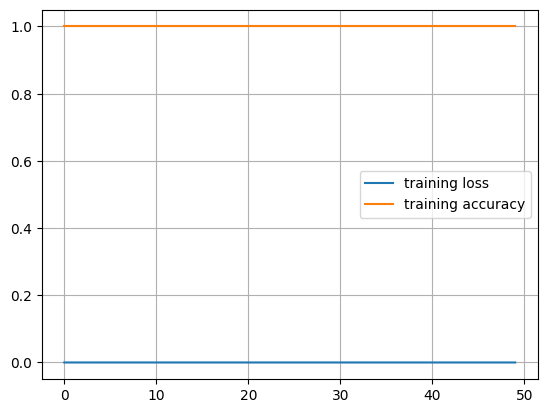

In [42]:
## stats on training data
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

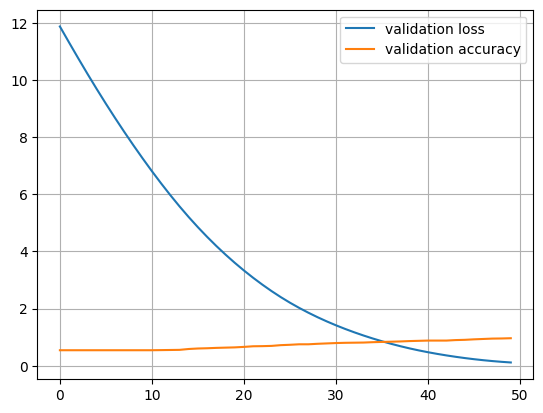

In [44]:
## stats on training data
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

1/1 [==============================] - 0s 313ms/step


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 15 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

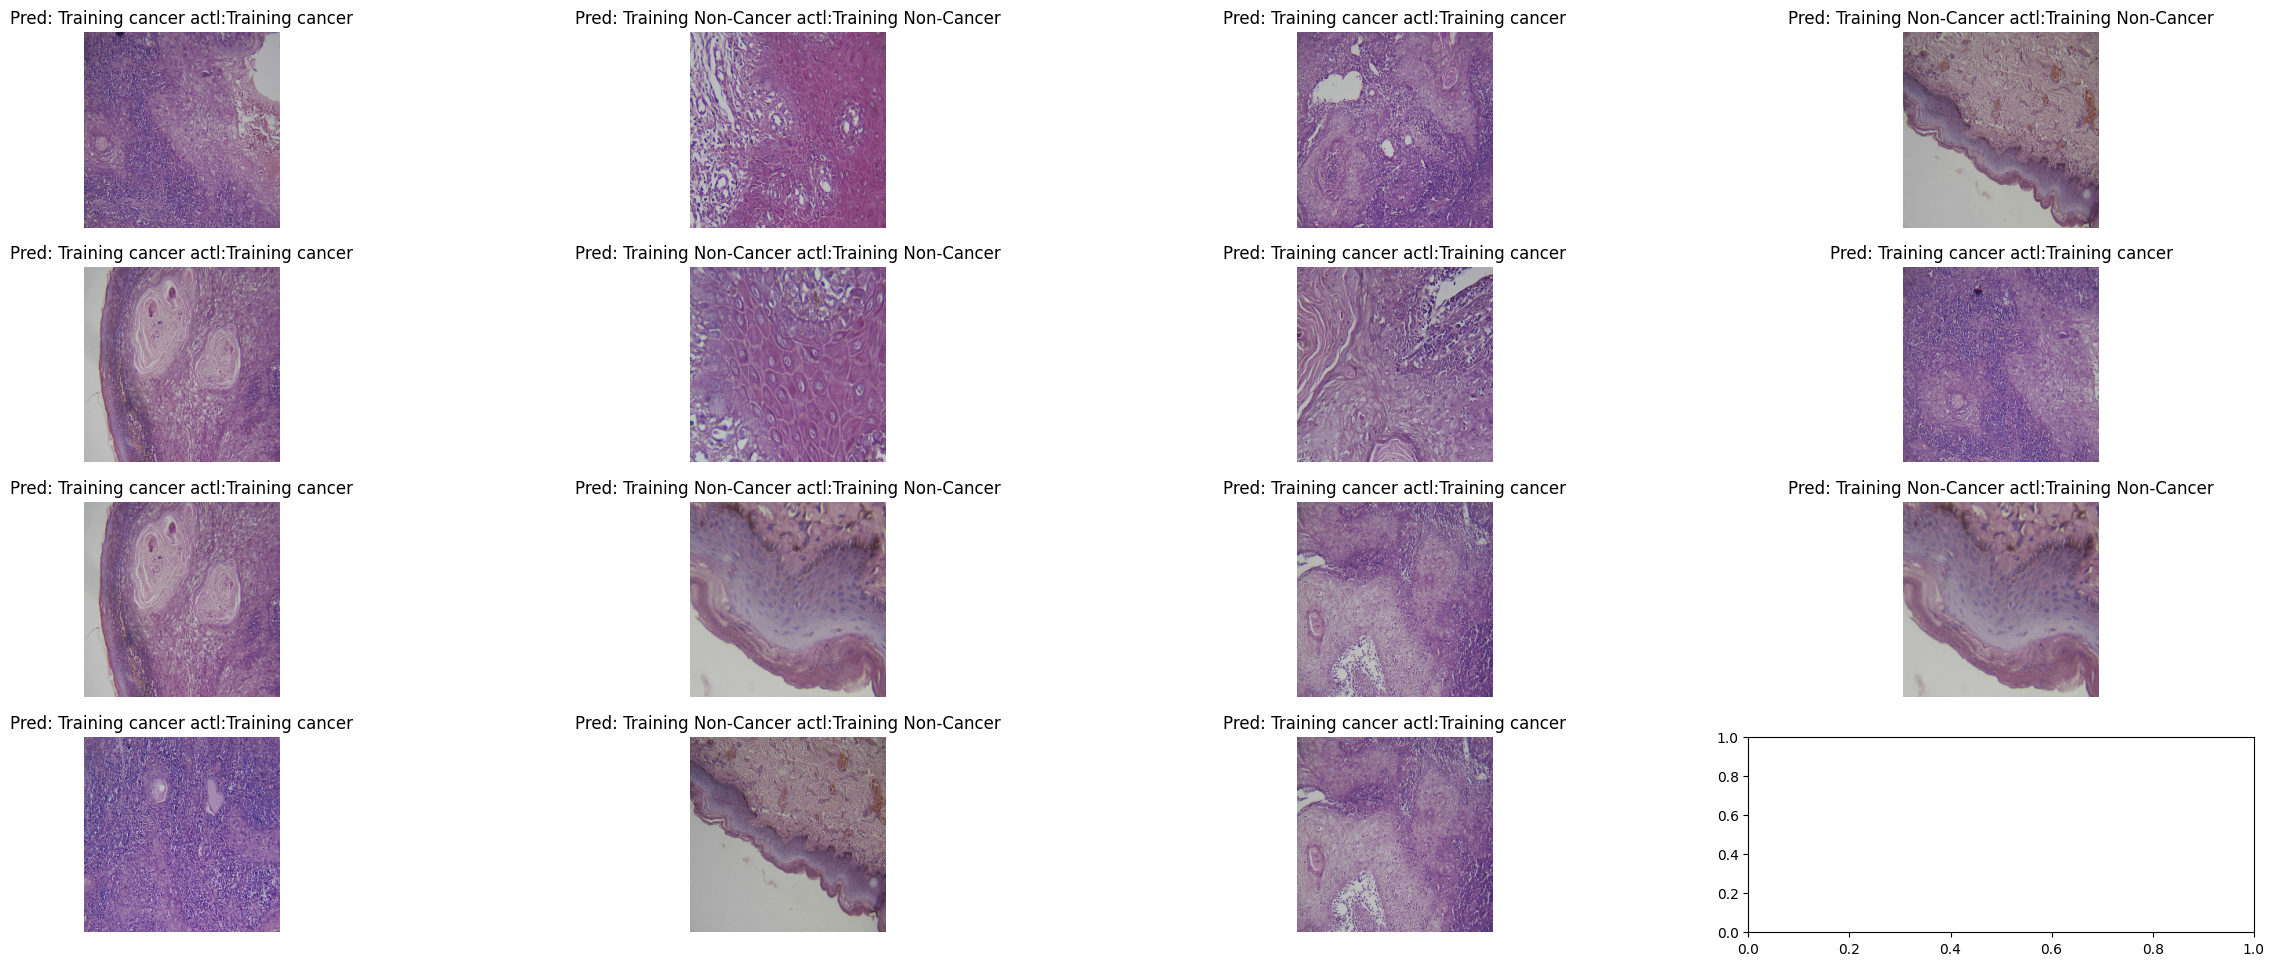

In [45]:
## lets vizualize results on testing data
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_data.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [75]:
from keras.models import model_from_json
import numpy as np

class cancerDetectionModel(object):

    class_nums = ['Training cancer', "Training Non-Cancer"]

    def __init__(self, model_json_file, model_weights_file):
        # load model from JSON file
        with open(model_json_file, "r") as json_file:
            loaded_model_json = json_file.read()
            self.loaded_model = model_from_json(loaded_model_json)

        # load weights into the new model
        self.loaded_model.load_weights(model_weights_file)
        self.loaded_model.make_predict_function()

    def predict_cancer(self, img):
        self.preds = self.loaded_model.predict(img)
        return cancerDetectionModel.class_nums[np.argmax(self.preds)], self.preds

In [87]:
full_train_df = pd.read_csv("D:/Dataset/converted_keras/labels.txt")
full_train_df.head()

0 cancer
0  1 Non-Cancer

In [135]:
print("Train Size: {}".format(len(os.listdir('D:\Dataset\Train\Training cancer'))))
print("Test Size: {}".format(len(os.listdir('D:\Dataset\Train\Training Non-Cancer'))))

Train Size: 126
Test Size: 105


In [102]:
import os
from PIL import Image
from matplotlib import pyplot as plt

In [127]:
root1 = 'D:\Dataset\Train\Training cancer'

fnames = os.listdir(root1)

In [131]:
len(fnames)

105

In [128]:
root2 = 'D:\Dataset\Train\Training Non-Cancer'

fnames = os.listdir(root2)

In [132]:
len(fnames)

105

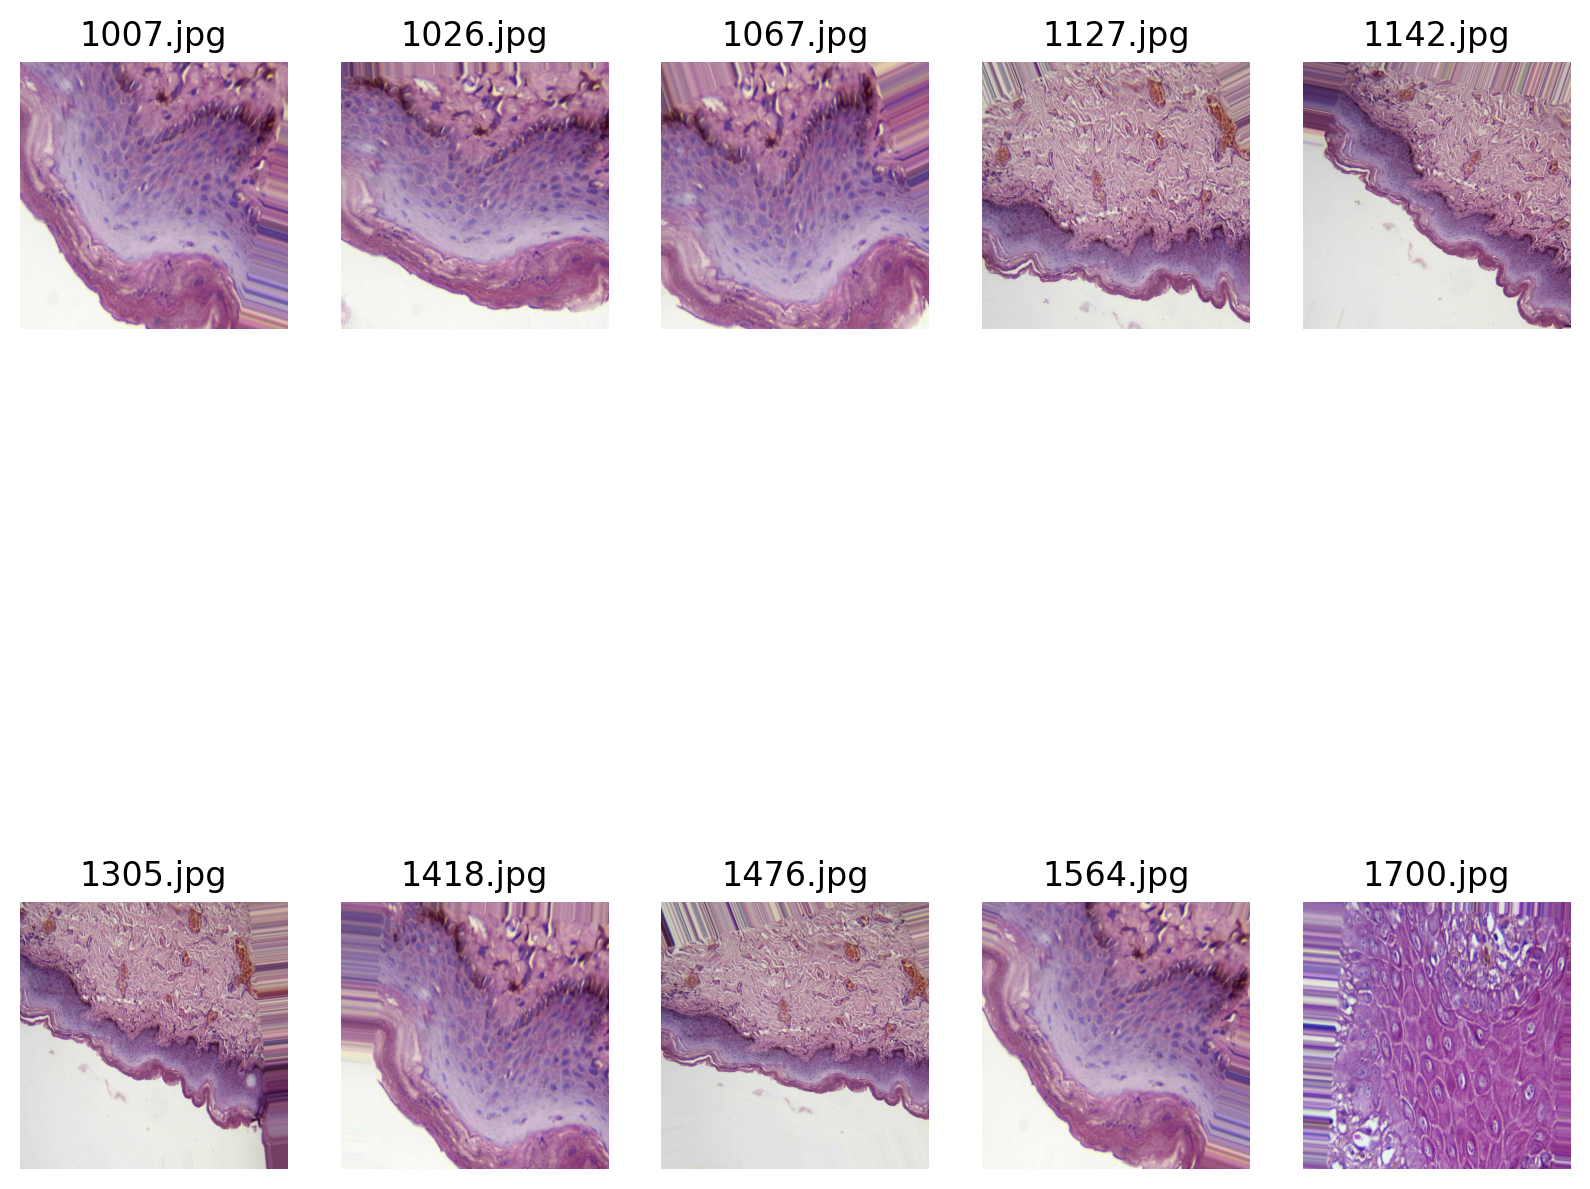

In [134]:
fig , axs = plt.subplots(nrows=2,ncols=5,figsize=(10,10))
axs = axs.flatten()
for i in range(10):
    filepath = os.path.join(root1,root2,fnames[i])
    img = Image.open(filepath)
    axs[i].imshow(img)
    axs[i].axis('off')
    axs[i].set_title(fnames[i])
plt.show()

In [ ]:
##### For CSV FORMATTTT
# from PIL import Image
# import numpy as np
# import sys
# import os
# import csv 

# def createFileList(myDir, format='jpg'):
#     fileList = []
#     print(myDir)
#     for root, dirs, files in os.walk(myDir, topdown = False):
#         for name in files:
#             if name.endswith(format):
#                 fullName = os.path.join(root, name)
#                 fileList.append(fullName)
#     return fileList
# myFileList = createFileList('D:\Dataset\Train\Training cancer')

# for file in myFileList:
#     print(file)
#     img_file = Image.open(file)
#     width, height = img_file.size
#     format = img_file.format
#     mode = img_file.mode
#     img_grey = img_file.convert('L')

#     value = np.asarray(img_grey.getdata(), dtype=np.int).reshape((img_grey.size[1], img_grey.size[0]))
#     value = value.flatten()
#     print(value)
#     with open("image_to_csv.csv", 'a') as f:
#         writer = csv.writer(f)
#         writer.writerow(value)



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os 
path = os.listdir('D:/Dataset/Train')
classes = {'Training cancer': 0, 'Training Non-Cancer': 1}

In [4]:
import cv2 
X = []
Y = []
for cls in classes:
    pth = 'D:/Dataset/Train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        img = cv2.resize(img, (1028,1028))
        X.append(img)
        Y.append(classes[cls])



In [5]:
np.unique(Y)

array([0, 1])

In [6]:
X = np.array(X)
Y = np.array(Y)

In [7]:
pd.Series(Y).value_counts()

1    290
0    251
dtype: int64

In [8]:
X.shape

(541, 1028, 1028)

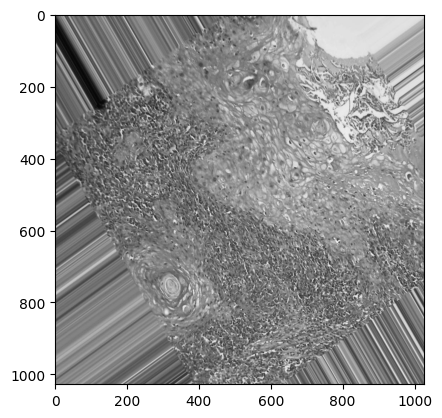

In [9]:
#Visualize Data 
plt.imshow(X[0], cmap='gray')

In [10]:
#Prepare Data
X_updated = X.reshape(len(X), -1)
X_updated.shape

(541, 1056784)

In [11]:
#split Data
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((432, 1056784), (109, 1056784))

In [13]:
#Feature Scaling 
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 5
255 7
1.0 0.0196078431372549
1.0 0.027450980392156862


In [15]:
#Fearute selection: PCA
from sklearn.decomposition import PCA

In [16]:
print(xtrain.shape, xtest.shape)
pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(432, 1056784) (109, 1056784)


In [ ]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

In [18]:
###TRAIN MODEL
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [19]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1) #Penality Parameter
lg.fit(pca_train, ytrain)


LogisticRegression(C=0.1)

In [20]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [21]:
#Evaluation
print("Training Score :", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score : 1.0
Testing Score: 0.9724770642201835


In [22]:
print("Training Score :", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score : 1.0
Testing Score: 0.9724770642201835


In [23]:
#Prediction
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 22,  59, 102], dtype=int64),)

In [24]:
pred[36]

1

In [25]:
ytest[36]

1

In [37]:
#TEST MODEL
dec = {0:'cancer', 1:'Non-Cancer'}

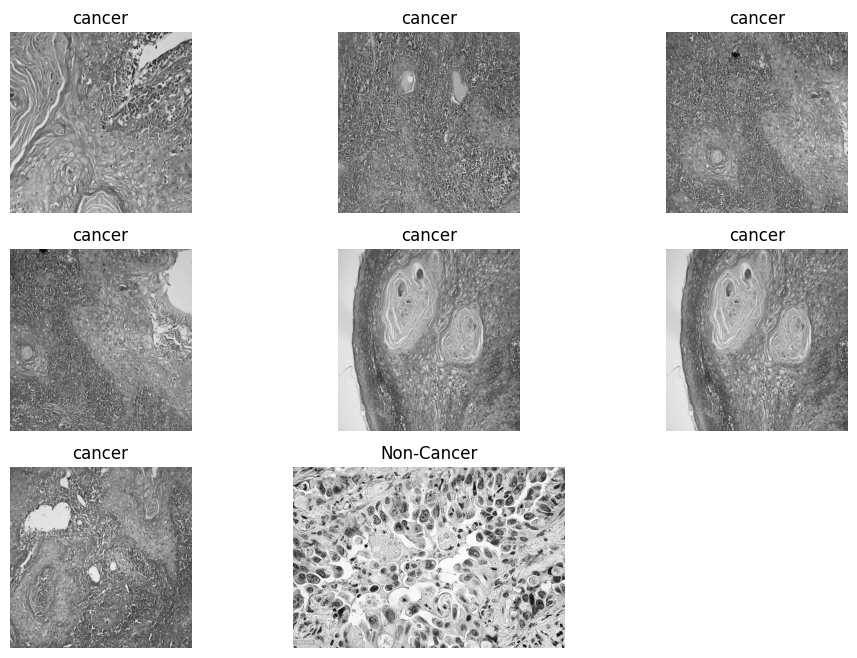

In [38]:
plt.figure(figsize=(12,8))
p = os.listdir('D:/Dataset/test/')
c=1
for i in os.listdir('D:/Dataset/test/cancer/')[:8]:
    plt.subplot(3,3,c)

    img = cv2.imread('D:/Dataset/test/cancer/'+i,0)
    img1 = cv2.resize(img, (1028,1028))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

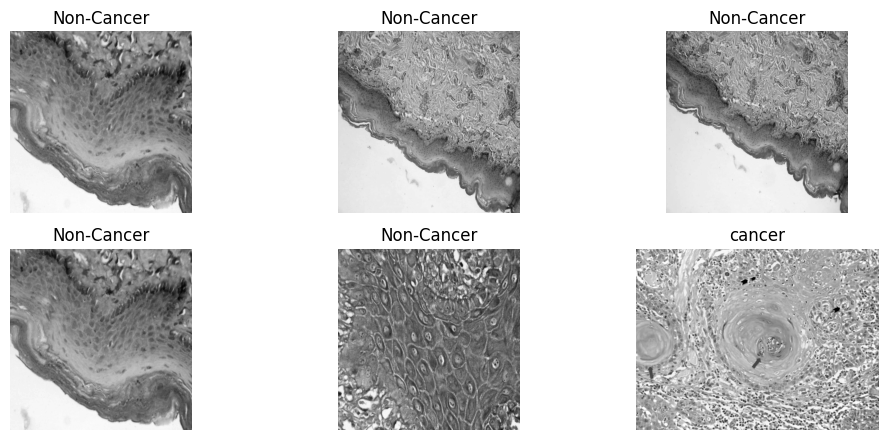

In [40]:
plt.figure(figsize=(12,8))
p = os.listdir('D:/Dataset/test/')
c=1
for i in os.listdir('D:/Dataset/test/Non-Cancer/')[:6]:
    plt.subplot(3,3,c)

    img = cv2.imread('D:/Dataset/test/Non-Cancer/'+i,0)
    img1 = cv2.resize(img, (1028,1028))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

In [44]:
BASE_PATH = 'D:/Dataset/Train/'
unique_classes = []
for path in os.listdir(BASE_PATH):
    unique_classes.append(path)
print(unique_classes)

['Training cancer', 'Training Non-Cancer']


In [46]:
class_index = [unique_classes[1], unique_classes[0]]
for c in class_index:
    print(c, "-", class_index.index(c))

Training Non-Cancer - 0
Training cancer - 1


In [47]:
images = []
masks = []
labels = []
for folder in os.listdir(BASE_PATH):
    class_path = os.path.join(BASE_PATH, folder)
    for img in os.listdir(class_path):
        if "_mask" not in img:
            img_path = os.path.join(class_path, img)
            msk_path = img_path.replace(".png", "_mask.png")
            # check if mask exist
            if os.path.exists(msk_path):
                images.append(img_path)
                masks.append(msk_path)
                labels.append(folder)

In [48]:
print(len(images))

541


In [49]:
images[0]

'D:/Dataset/Train/Training cancer\\1056.jpg'

In [50]:
input_images_size = 256
channel = 1

In [51]:
import cv2
import scipy
import scipy.ndimage


def load_image(img_path):
    """ Load single image as Grayscale
    """
    # load image as grayscale
    img = cv2.imread(img_path, 0)
    return img

def padding(img, msk):
    """ Pad images to make them square
    """
    size = np.max(img.shape)

    offset_x = (size-img.shape[0])//2
    offset_y = (size-img.shape[1])//2

    blank_image = np.zeros((size, size))
    blank_mask = np.zeros((size, size))

    blank_image[offset_x:offset_x+img.shape[0],
               offset_y:offset_y+img.shape[1]] = img
    blank_mask[offset_x:offset_x+img.shape[0],
               offset_y:offset_y+img.shape[1]] = msk
    return blank_image, blank_mask

def resize_mask(mask):
    """Resize mask, its different because mask pixel value can change because of resize
    """
    new_size = np.array([input_images_size, input_images_size]) / mask.shape
    mask = scipy.ndimage.interpolation.zoom(mask, new_size)
    return mask

def resize(img):
    """Resize image
    """
    img = cv2.resize(img, (input_images_size, input_images_size))
    return img
        
def preprocess(img):
    """Image preprocessing
    Normalize image
    """
    img = img/255.0
    return img

def inverse_preprocess(img):
    """Inverse of preprocessing
    """
    img = img*255
    return img

def load_data(img_path, msk_path, label):
    """Load image, mask and repalce mask value with class index
    0 = normal
    1 = benign
    2 = malignant
    """
    img = load_image(img_path)
    msk = load_image(msk_path)
    img, msk = padding(img, msk)
    label_indx = class_index.index(label)
    msk[msk == 255] = 1
    msk = msk.astype("uint8")
    img = resize(img)
    msk = resize_mask(msk)
    new_mask = np.zeros((input_images_size, input_images_size, 2))
    if label_indx != 0:
        new_mask[:, :, label_indx-1] = msk
#     print(np.unique(msk), label, label_indx)
    return img, new_mask

def load_batch(images, masks, labels):
    """Load Batch of data
    """
    batch_x = []
    batch_y = []
    for i, m, l in zip(images, masks, labels):
        img, msk = load_data(i, m, l)
        img = preprocess(img)
        batch_x.append(img)
        batch_y.append(msk)
    return np.array(batch_x), np.array(batch_y) 

16.55059814453125 217.49298095703125 (256, 256)


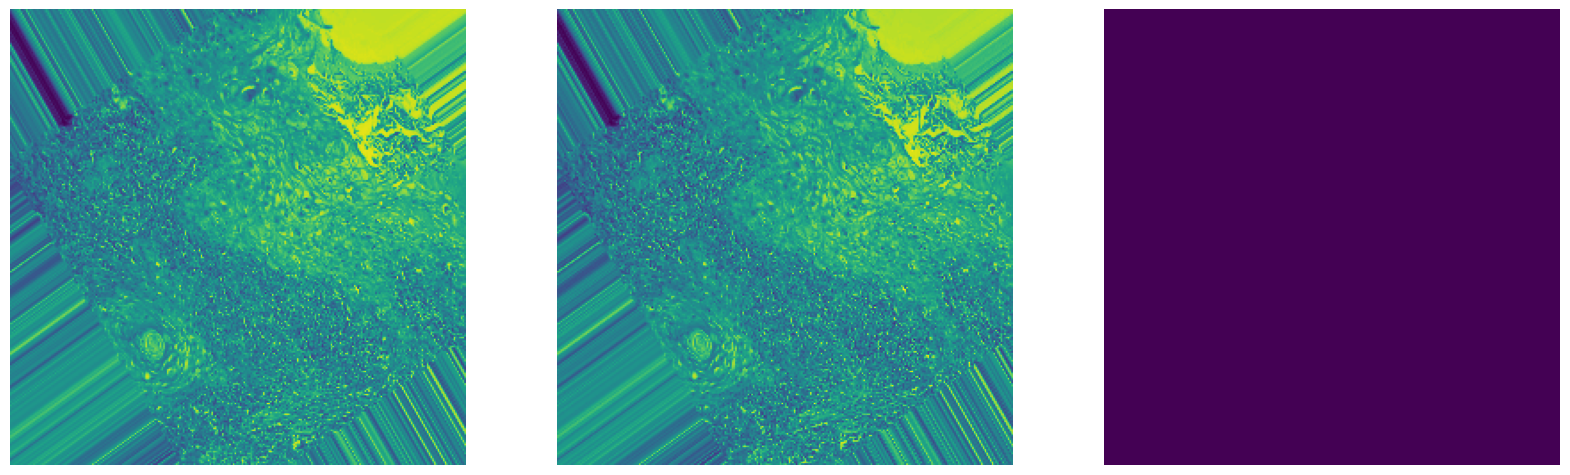

21.66058349609375 251.78179931640625 (256, 256)


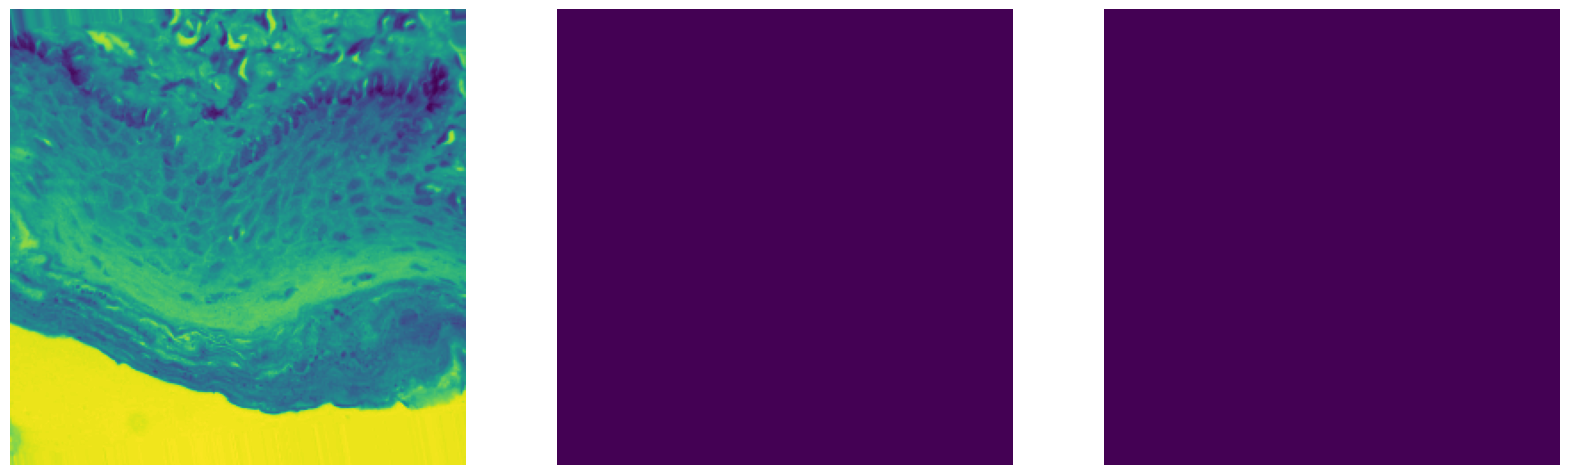

IndexError: list index out of range

In [52]:
import matplotlib.pyplot as plt
for i in [0, 500, 600]:
    indx = i
    img, msk = load_data(images[indx], masks[indx], labels[indx])
    print(np.min(img), np.max(img), img.shape)
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(msk[:, :, 0])
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(msk[:, :, 1])
    plt.show()


In [53]:
images = np.array(images)
masks = np.array(masks)
labels = np.array(labels)

In [54]:
!pip install segmentation_models

In [62]:
pip install upgrade keras

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [65]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow import keras 
import segmentation_models as sm
import tensorflow as tf

sm.framework()

BACKBONE = 'resnet34'
LR = 0.00001
model = sm.Unet(BACKBONE, classes=2, activation="sigmoid",input_shape=(input_images_size,input_images_size, channel),encoder_weights=None)

optim = tf.keras.optimizers.Adam(LR)

dice_loss = sm.losses.DiceLoss()
focal_loss = sm.losses.BinaryFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = [sm.metrics.IOUScore(threshold=0.5),
           sm.metrics.FScore(threshold=0.5)]

model.compile(optim, total_loss, metrics)

Segmentation Models: using `tf.keras` framework.


In [66]:
batch_size = 4
history = {"epoch": []}
for e in range(100):
    print("epoch:",e, end=" > ")
    indexes = list(range(len(images)))
    temp_history = {"loss": [],
                   "IOU": [],
                   "F-Score": []}
    for b in range(0, len(images), batch_size):
        bs = b
        be = bs+batch_size
        batch_index = indexes[bs:be]
        batch_x, batch_y = load_batch(images[batch_index], masks[batch_index], labels[batch_index])
        batch_x = np.expand_dims(batch_x, axis=-1)
        batch_y = np.expand_dims(batch_y, axis=-1)
        batch_y = batch_y.astype("float32")
        loss = model.train_on_batch(batch_x, batch_y)
        temp_history["loss"].append(loss[0])
        temp_history["IOU"].append(loss[1])
        temp_history["F-Score"].append(loss[2])
    print("loss", np.round(np.mean(temp_history["loss"]), 4),"IOU", np.round(np.mean(temp_history["IOU"]), 4),"F-Score", np.round(np.mean(temp_history["F-Score"]), 4))
    
    history["epoch"].append(temp_history)
    
model.save_weights("cancer")

epoch: 0 > loss 0.814 IOU 0.1356 F-Score 0.1698
epoch: 1 > loss -1.2409 IOU 0.2723 F-Score 0.2485
epoch: 2 > loss -4.4345 IOU 0.3412 F-Score 0.2755
epoch: 3 > loss -8.0726 IOU 0.2924 F-Score 0.258
epoch: 4 > loss -11.4899 IOU 0.2444 F-Score 0.2374
epoch: 5 > 

KeyboardInterrupt: 

16.55059814453125 217.49298095703125 (256, 256)
(256, 256)
1/1 [==============================] - 1s 1s/step


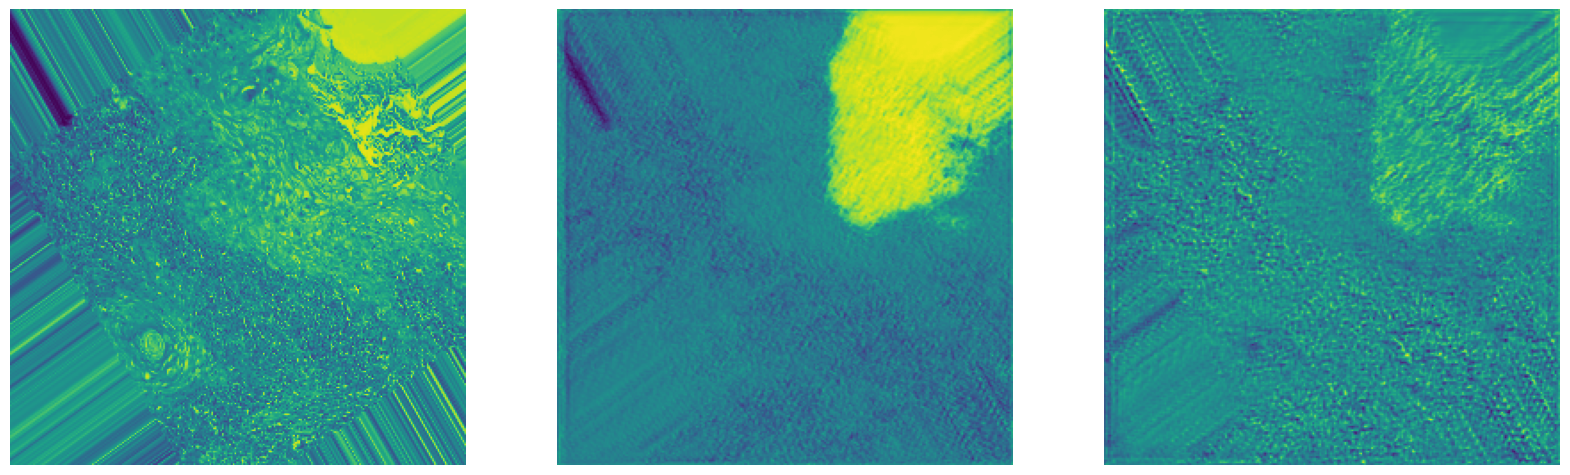

21.66058349609375 251.78179931640625 (256, 256)
(256, 256)
1/1 [==============================] - 0s 160ms/step


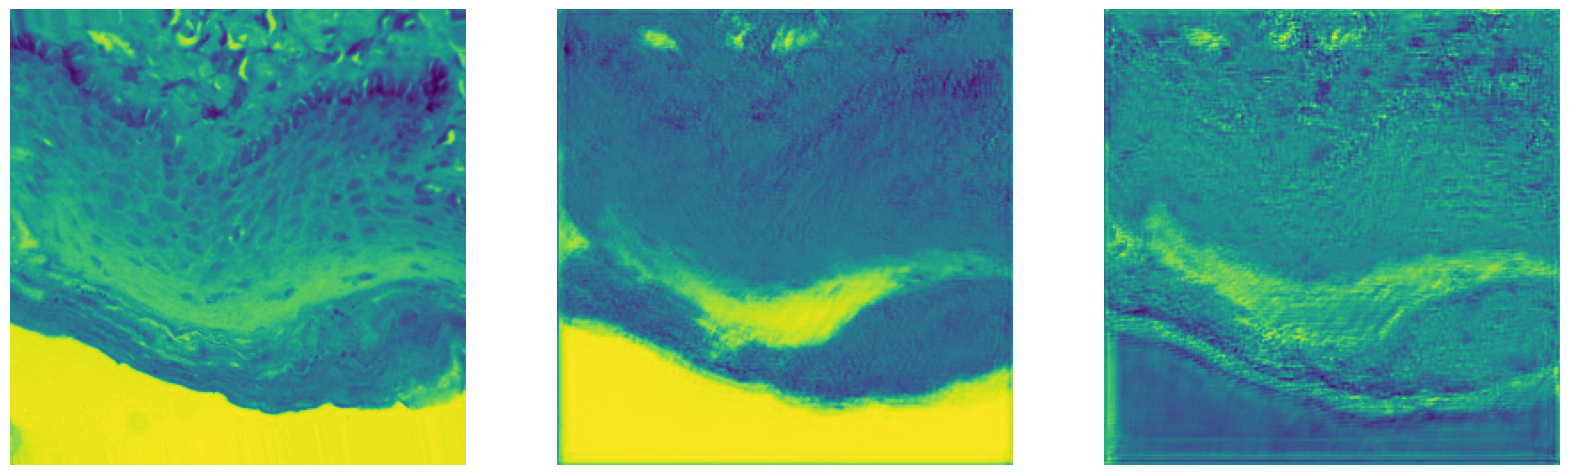

IndexError: index 600 is out of bounds for axis 0 with size 541

In [67]:
import matplotlib.pyplot as plt
for i in [0, 500, 600]:
    indx = i
    img, msk = load_data(images[indx], masks[indx], labels[indx])
    print(np.min(img), np.max(img), img.shape)
    print(img.shape)
    
    img2 = preprocess(img)
    pred = model.predict(np.array([img2]))
    pred = pred[0]

    plt.figure(figsize=(20, 20))
    plt.subplot(1, 3, 1)
    plt.axis("off")
    plt.imshow(img)
    plt.subplot(1, 3, 2)
    plt.axis("off")
    plt.imshow(pred[:, :, 0])
    plt.subplot(1, 3, 3)
    plt.axis("off")
    plt.imshow(pred[:, :, 1])
    plt.show()

In [41]:
from keras.models import load_model  # TensorFlow is required for Keras to work
from PIL import Image, ImageOps  # Install pillow instead of PIL
import numpy as np

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("D:/Dataset/converted_keras/keras_model.h5", compile=False)

# Load the labels
class_names = open("D:/Dataset/converted_keras/labels.txt", "r").readlines()

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image ... PATH...PATH..PATH
image = Image.open("D:/Dataset/test/Non-Cancer/6.png").convert("RGB")

# resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)

# turn the image into a numpy array
image_array = np.asarray(image)

# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1

# Load the image into the array
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)


1/1 [==============================] - 1s 1s/step
Class: cancer
Confidence Score: 0.9686299
